In [54]:
import pandas as pd
import numpy as np
#filtering the warnings to keep the notebook clean
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
pd.set_option('display.precision', 2)
pd.reset_option('display.precision')

In [55]:
train_file=pd.read_csv('train.csv')
test_file=pd.read_csv('test.csv')
print('The Training dataset contains {} rows and {} columns.'.format(len(train_file), len(train_file.columns)))

The Training dataset contains 1460 rows and 81 columns.


## 1.Visualization to pick the best central tendency

In [56]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style("darkgrid", {"grid.color": ".7", "grid.linestyle": ":"})
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (12, 7)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

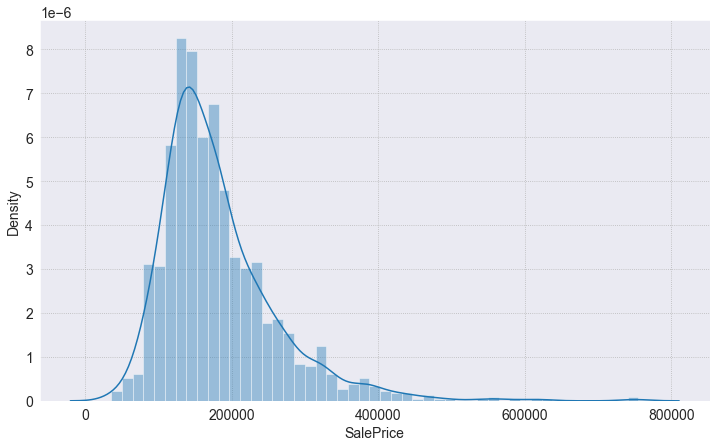

In [57]:
sns.distplot(train_file['SalePrice'])
plt.show()

## The plot of Sales shows that it is rightly skewed.Hence Median is an good measure of central tendency

In a skewed distribution, the median is often a preferred measure of central tendency, as the mean is not usually in the middle of the distribution.The problem with mode is that in reality we will get values like 10.1,10.2,10.3.Not exactly 10 (let's say 10 is the mode).So practically it is impossible to get the correct mode

## 2.Preparing the data for training and model building
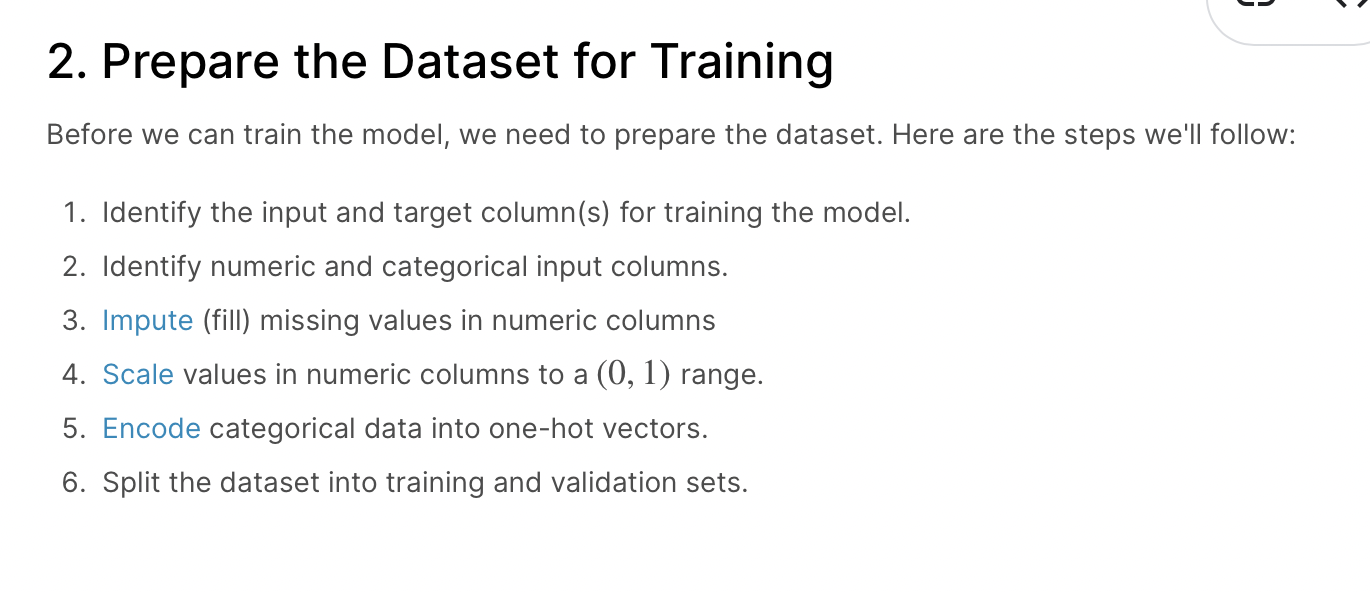

## a) Identify Inputs and Targets


## The first column is ID and last is target.That can be removed

In [58]:
input_train=train_file.copy()
## X train
input_train.drop(columns=["Id","SalePrice"],inplace=True)
## Y train
input_targets=train_file.iloc[:,-1]

In [59]:
#getting the list of numeric columns
numeric_cols = input_train.select_dtypes(include='number').columns.tolist()


In [60]:
#getting the list of categorical columns
categorical_cols = input_train.select_dtypes(include='object').columns.tolist()


##  b) Impute Numerical Data

--Some of the numeric columns in our dataset contain missing values (nan).

In [61]:
missing_counts = input_train[numeric_cols].isna().sum().sort_values(ascending=False)
missing_counts[missing_counts > 0]

LotFrontage    259
GarageYrBlt     81
MasVnrArea       8
dtype: int64

## Numerical Columns are imputed with Median

In [62]:
from sklearn.impute import SimpleImputer

In [63]:
# 1. Create the imputer
imputer = SimpleImputer(strategy = 'median')

In [64]:
# 2. Fit and transform the imputer to the numeric colums
input_train[numeric_cols]=imputer.fit_transform(input_train[numeric_cols])


In [65]:
input_train[numeric_cols].isna().sum()

MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64

In [66]:
input_train[numeric_cols].describe().loc[['min','max']]

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
min,20.0,21.0,1300.0,1.0,1.0,1872.0,1950.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2006.0
max,190.0,313.0,215245.0,10.0,9.0,2010.0,2010.0,1600.0,5644.0,1474.0,...,1418.0,857.0,547.0,552.0,508.0,480.0,738.0,15500.0,12.0,2010.0


In [67]:
from sklearn.preprocessing import MinMaxScaler

In [68]:
# Create the scaler
scaler =MinMaxScaler()

In [69]:
# Fit and transform the scaler to the numeric columns
input_train[numeric_cols]=scaler.fit_transform(input_train[numeric_cols])


In [70]:
input_train[numeric_cols].describe().loc[['min', 'max']]

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0



--impute catgorical columns

In [71]:
# 1. Create the imputer for categorical variables
imputer_cate= SimpleImputer(strategy = 'most_frequent')
input_train[categorical_cols]=imputer_cate.fit_transform(input_train[categorical_cols])
input_train[categorical_cols].isnull().sum().sort_values(ascending=False)

SaleCondition    0
Condition2       0
ExterQual        0
MasVnrType       0
Exterior2nd      0
Exterior1st      0
RoofMatl         0
RoofStyle        0
HouseStyle       0
BldgType         0
Condition1       0
Foundation       0
Neighborhood     0
LandSlope        0
LotConfig        0
Utilities        0
LandContour      0
LotShape         0
Alley            0
Street           0
ExterCond        0
BsmtQual         0
SaleType         0
FireplaceQu      0
MiscFeature      0
Fence            0
PoolQC           0
PavedDrive       0
GarageCond       0
GarageQual       0
GarageFinish     0
GarageType       0
Functional       0
BsmtCond         0
KitchenQual      0
Electrical       0
CentralAir       0
HeatingQC        0
Heating          0
BsmtFinType2     0
BsmtFinType1     0
BsmtExposure     0
MSZoning         0
dtype: int64

## Encode Categorical Columns

--Our dataset contains several categorical columns, each with a different number of categories.

In [72]:
## We count no of categories in each categorical variablei
input_train[categorical_cols].nunique().sum()

252

## Since sk learn works on with numeric data, we need to convert categorical data to numbers. A common technique is to use one-hot encoding for categorical columns. One hot encoding involves adding a new binary (0/1) column for each unique category of a categorical column.

In [73]:
from sklearn.preprocessing import OneHotEncoder

In [74]:
# 1. Create the encoder
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

In [75]:
# 2. Fit the encoder to the categorical colums
encoder.fit(input_train[categorical_cols])

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [76]:
# 3. Generate column names for each category
encoded_cols = (list(encoder.get_feature_names_out(categorical_cols)))


## So [188]=[190]
## No of entries=No of encoded columns

In [77]:
# 4. Transsform and add new one-hot category columns
input_train[encoded_cols] = encoder.transform(input_train[categorical_cols])


 ## drop the categorical columns

In [78]:
input_train.drop(categorical_cols,axis=1,inplace=True)
input_train

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.235294,0.150685,0.033420,0.666667,0.500,0.949275,0.883333,0.122500,0.125089,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.000000,0.202055,0.038795,0.555556,0.875,0.753623,0.433333,0.000000,0.173281,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.235294,0.160959,0.046507,0.666667,0.500,0.934783,0.866667,0.101250,0.086109,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.294118,0.133562,0.038561,0.666667,0.500,0.311594,0.333333,0.000000,0.038271,0.000000,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.235294,0.215753,0.060576,0.777778,0.500,0.927536,0.833333,0.218750,0.116052,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.235294,0.140411,0.030929,0.555556,0.500,0.920290,0.833333,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1456,0.000000,0.219178,0.055505,0.555556,0.625,0.768116,0.633333,0.074375,0.139972,0.110583,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1457,0.294118,0.154110,0.036187,0.666667,1.000,0.500000,0.933333,0.000000,0.048724,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1458,0.000000,0.160959,0.039342,0.444444,0.625,0.565217,0.766667,0.000000,0.008682,0.698100,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


## Training and Validation Set
Finally, let's split the dataset into a training and validation set. We'll use a randomly select 25% subset of the data for validation. Also, we'll use just the numeric and encoded columns, since the inputs to our model must be numbers.

In [79]:
from sklearn.model_selection import train_test_split


In [80]:
x_train,x_test,y_train,y_test=train_test_split(input_train,input_targets,test_size=0.2,random_state=30)
print(x_train.shape)
print(x_test.shape)

(1168, 288)
(292, 288)


In [81]:
x_test.describe().loc[['min','max']]

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
min,0.0,0.000000,0.001776,0.222222,0.125,0.021739,0.0,0.00000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,1.0,0.523973,1.000000,1.000000,1.000,1.000000,1.0,0.73125,0.371368,0.759837,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0


## 3. Train a Linear Regression Model
We're now ready to train the model. Linear regression is a commonly used technique for solving. In a linear regression model, the target is modeled as a linear combination (or weighted sum) of input features. The predictions from the model are evaluated using a loss function like the Root Mean Squared Error (RMSE).

In [82]:
#we will use Ridge from sklearn.linear_model for regression
from sklearn.linear_model import Ridge

In [83]:
# Create the model
model = Ridge()

In [84]:
# Fit the model using inputs and targets
model.fit(x_train,y_train)

Ridge()

## 4. Make Predictions and Evaluate Your Model
The model is now trained, and we can use it to generate predictions for the training and validation inputs. We can evaluate the model's performance using the RMSE (root mean squared error) loss function.

In [85]:
 from sklearn.metrics import mean_squared_error

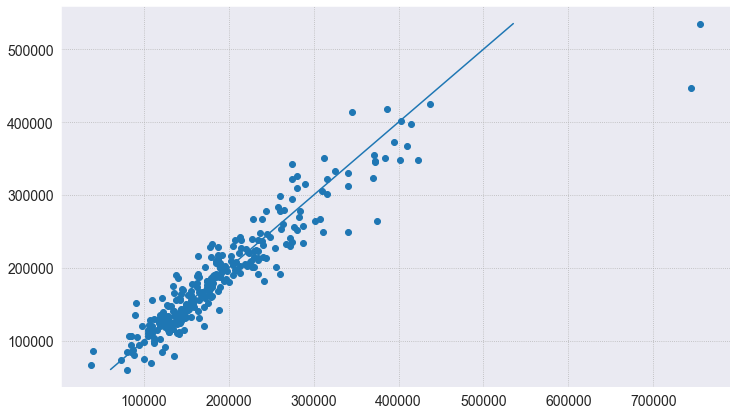

In [86]:
y_pred= model.predict(x_test).flatten()
plt.scatter(y_test,y_pred)

x=np.linspace(min(y_pred),max(y_pred),10000)
y=x
plt.plot(y,x)

plt.show()

## y_prediction should almost match y_test for accuracy i.e y=x line.So bias is less

In [87]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

32997.86037439457

In [88]:
print('The RMSE loss for the training set is $ {}.'.format(rmse))

The RMSE loss for the training set is $ 32997.86037439457.


## 5.Feature Importance

Let's look at the weights assigned to different columns, to figure out which columns in the dataset are the most important.

In [89]:
weights = model.coef_

In [90]:
weights_df = pd.DataFrame({
    'columns': x_train.columns,
    'weight': weights
}).sort_values('weight', ascending=False)

## Predicting Price using sample input

In [91]:
weights_df

,columns,weight
15,GrLivArea,71304.850979
12,1stFlrSF,63337.740878
131,RoofMatl_WdShngl,61166.630937
3,OverallQual,58021.505870
22,TotRmsAbvGrd,49569.317915
...,...,...
21,KitchenAbvGr,-19752.588740
240,GarageType_2Types,-24170.055040
250,GarageQual_Fa,-24243.480972
101,Condition2_PosN,-88686.405875


In [92]:
def helper(single_input):
    input_df = single_input.iloc[:,1:];
    id=test_file.iloc[:,0].tolist()
    input_df[numeric_cols] = imputer.transform(input_df[numeric_cols])
    input_df[numeric_cols] = scaler.transform(input_df[numeric_cols])
    input_df[encoded_cols] = encoder.transform(input_df[categorical_cols].values)
    X_input = input_df[numeric_cols + encoded_cols]
    sales_p=np.round(model.predict(X_input).flatten(),2).tolist()
    dicty={'Id':id,'SalePrice':sales_p}
    return pd.DataFrame(dicty)

In [93]:
helper(test_file).to_csv('output.csv',header=['Id','SalePrice'],index=False)

In [94]:
file2 = pd.read_csv("output.csv")
file2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         1459 non-null   int64  
 1   SalePrice  1459 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 22.9 KB
